### Preprocessing Our Data

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

price_data = pd.read_csv("/Users/andrewlee/NotebookSamples/Datasets/newDailyPricesTechCompanies.csv")
sentiment_data = pd.read_excel("/Users/andrewlee/NotebookSamples/Datasets/news_sentiment_data.xlsx", sheet_name=1)


In [2]:
price_data.head()

,date,1. open,2. high,3. low,4. close,5. volume,TickerName
0,2023-10-20,0.8800,0.9000,0.880,0.9000,531677,KSCP
1,2023-10-19,0.9301,0.9500,0.880,0.8802,1023308,KSCP
2,2023-10-18,0.9191,0.9699,0.880,0.9277,638286,KSCP
3,2023-10-17,0.9060,0.9796,0.906,0.9200,773394,KSCP
4,2023-10-16,0.8700,0.9395,0.851,0.9291,701309,KSCP


In [3]:
sentiment_data.head()

,date,News Sentiment
0,1980-01-01,-0.038265
1,1980-01-02,-0.107314
2,1980-01-03,-0.090467
3,1980-01-05,-0.068480
4,1980-01-06,-0.090640


In [4]:
price_data['date'] = pd.to_datetime(price_data['date'])

In [5]:
price_data.columns = ["date", "open", "high", "low", "close", "volume", "TickerName"]
price_data.head()


,date,open,high,low,close,volume,TickerName
0,2023-10-20,0.8800,0.9000,0.880,0.9000,531677,KSCP
1,2023-10-19,0.9301,0.9500,0.880,0.8802,1023308,KSCP
2,2023-10-18,0.9191,0.9699,0.880,0.9277,638286,KSCP
3,2023-10-17,0.9060,0.9796,0.906,0.9200,773394,KSCP
4,2023-10-16,0.8700,0.9395,0.851,0.9291,701309,KSCP


In [6]:
merged_data = pd.merge(sentiment_data, price_data, on='date', how='inner')

In [7]:
merged_data.head()

,date,News Sentiment,open,high,low,close,volume,TickerName
0,2022-01-27,-0.048525,14.4400,15.4800,5.91,5.91,1608576,KSCP
1,2022-01-28,-0.058983,7.0700,16.2900,6.33,16.29,26574308,KSCP
2,2022-01-31,-0.067368,19.1551,27.5000,18.35,21.40,42899912,KSCP
3,2022-02-01,-0.070566,15.9500,17.6000,12.10,12.44,18493106,KSCP
4,2022-02-02,-0.061209,12.3549,12.3549,9.40,9.55,12613046,KSCP


In [8]:
fixed_data = pd.DataFrame()

for ticker in merged_data["TickerName"].unique():
    print(ticker)
    
    # Filter the data for the current ticker
    current_ticker_data = merged_data[merged_data["TickerName"] == ticker]
    
    # Sort the data by date
    current_ticker_data = current_ticker_data.sort_values(by="date", ascending=True, ignore_index=True)
    
    print(current_ticker_data)
    
    # Calculate price change
    dummy = np.array(current_ticker_data["close"])
    per_change = (dummy[:-1] - dummy[1:]) / dummy[:-1]
    
    # Remove the first row
    current_ticker_data = current_ticker_data.iloc[1:, :]

    # Update the 'close' column with price changes
    current_ticker_data["close"] = per_change
    
    # Concatenate the current ticker data to the fixed_data
    fixed_data = pd.concat([fixed_data, current_ticker_data], ignore_index=True)



KSCP
          date  News Sentiment     open     high      low    close    volume  \
0   2022-01-27       -0.048525  14.4400  15.4800   5.9100   5.9100   1608576   
1   2022-01-28       -0.058983   7.0700  16.2900   6.3300  16.2900  26574308   
2   2022-01-31       -0.067368  19.1551  27.5000  18.3500  21.4000  42899912   
3   2022-02-01       -0.070566  15.9500  17.6000  12.1000  12.4400  18493106   
4   2022-02-02       -0.061209  12.3549  12.3549   9.4000   9.5500  12613046   
..         ...             ...      ...      ...      ...      ...       ...   
426 2023-10-09       -0.079329   0.7900   0.8460   0.7600   0.8187    975824   
427 2023-10-10       -0.107545   0.8203   0.9700   0.8187   0.9624   2510575   
428 2023-10-11       -0.084724   0.9600   0.9989   0.9100   0.9580   1417694   
429 2023-10-12       -0.073453   0.9575   0.9599   0.8900   0.9284    703626   
430 2023-10-13       -0.073652   0.9286   0.9320   0.8500   0.8716    598178   

    TickerName  
0         KSCP  


In [9]:
fixed_data

,date,News Sentiment,open,high,low,close,volume,TickerName
0,2022-01-28,-0.058983,7.0700,16.2900,6.3300,-1.756345,26574308,KSCP
1,2022-01-31,-0.067368,19.1551,27.5000,18.3500,-0.313689,42899912,KSCP
2,2022-02-01,-0.070566,15.9500,17.6000,12.1000,0.418692,18493106,KSCP
3,2022-02-02,-0.061209,12.3549,12.3549,9.4000,0.232315,12613046,KSCP
4,2022-02-03,-0.066922,8.9700,10.8000,8.6100,0.070157,8704423,KSCP
...,...,...,...,...,...,...,...,...
1424,2023-10-09,-0.079329,0.3466,0.3569,0.2920,0.076899,107309,ASST
1425,2023-10-10,-0.107545,0.3050,0.3399,0.3000,0.000333,107440,ASST
1426,2023-10-11,-0.084724,0.3440,0.4550,0.3255,-0.450000,1223609,ASST
1427,2023-10-12,-0.073453,0.4200,0.5485,0.3906,-0.198161,1041315,ASST


In [10]:
from sklearn.model_selection import train_test_split

train = pd.DataFrame()
test = pd.DataFrame()

for ticker in fixed_data["TickerName"].unique():

    current_ticker_data = fixed_data[fixed_data["TickerName"] == ticker]
    
    train_sub, test_sub = train_test_split(current_ticker_data, test_size=0.3, shuffle=False)
    
    train = pd.concat([train, train_sub], ignore_index=True)
    test = pd.concat([test, test_sub], ignore_index=True)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = train.select_dtypes(include=[np.number]).columns

scaler.fit(train[numerical_cols])

train_scaled = train
test_scaled = test
train_scaled[numerical_cols] = scaler.transform(train[numerical_cols])
test_scaled[numerical_cols] = scaler.transform(test[numerical_cols])

In [12]:
train_scaled.head()

,date,News Sentiment,open,high,low,close,volume,TickerName
0,2022-01-28,0.875115,0.977075,2.765040,0.980013,-13.070094,3.947411,KSCP
1,2022-01-31,0.797127,4.158263,5.211128,4.669985,-2.342690,6.489067,KSCP
2,2022-02-01,0.767388,3.314577,3.050890,2.751323,3.103201,2.689287,KSCP
3,2022-02-02,0.854408,2.368231,1.906378,1.922460,1.717329,1.773848,KSCP
4,2022-02-03,0.801275,1.477217,1.567090,1.679941,0.511543,1.165333,KSCP


In [13]:
test_scaled.head()

,date,News Sentiment,open,high,low,close,volume,TickerName
0,2023-04-12,-0.588149,-0.686552,-0.621515,-0.763606,0.181620,-0.082751,KSCP
1,2023-04-13,-0.512782,-0.698029,-0.634607,-0.768733,0.463354,0.435679,KSCP
2,2023-04-14,-0.452544,-0.711533,-0.645626,-0.767965,-0.051012,0.039774,KSCP
3,2023-04-17,-0.255684,-0.707084,-0.628083,-0.760597,-1.148398,0.063262,KSCP
4,2023-04-18,-0.148182,-0.686552,-0.625879,-0.755931,0.383717,-0.000934,KSCP


In [14]:
print(f"Train set shape: {train_scaled.shape}")
print(f"Test set shape: {test_scaled.shape}")
print(f"Our latest training date is {train_scaled['date'].max()}")

Train set shape: (998, 8)
Test set shape: (431, 8)
Our latest training date is 2023-07-31 00:00:00


#### Plotting our Time Series

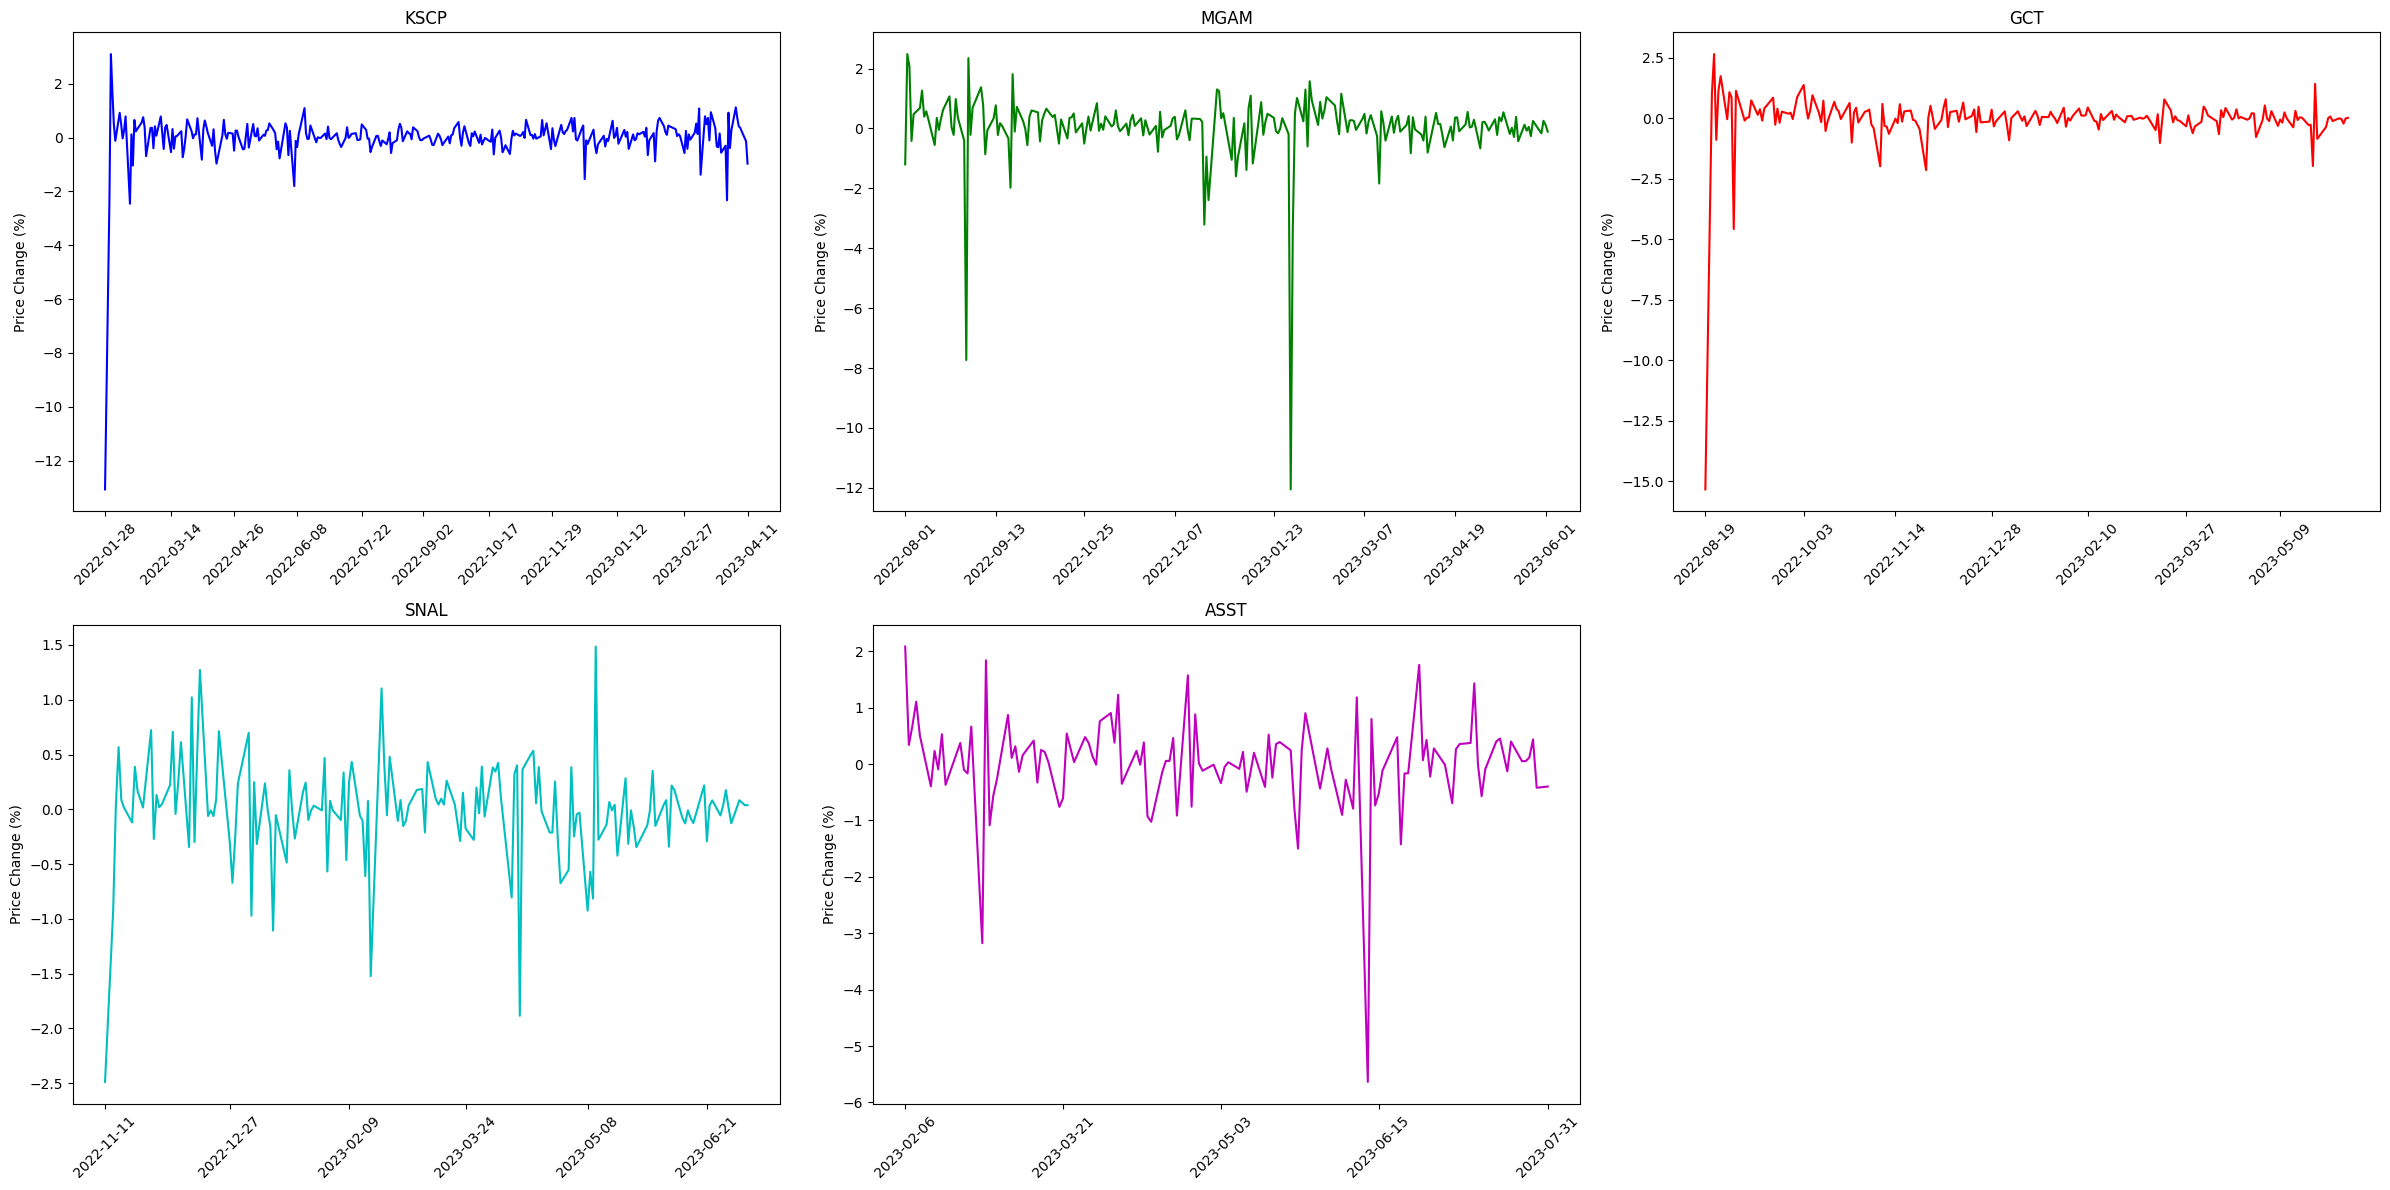

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(24, 12))
colors = ["b", "g", "r", "c", "m"]


unique_tickers = train_scaled["TickerName"].unique()

for index, i in enumerate(unique_tickers):
    row_index, col_index = divmod(index, 3)
    

    ax = axes[row_index, col_index]
    
    temporary = train_scaled[train_scaled["TickerName"] == i]

    ax.plot(temporary["date"], temporary["close"], label=i, color=colors[index])
    ax.set_xticks(temporary["date"].unique()[0:len(temporary["date"].unique()):30])
    ax.set_ylabel("Price Change (%)")
    ax.tick_params(axis='x', rotation=45)  
    ax.set_title(i) 


fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

### Running the ACF, ADF, PACF Functions

In [16]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

adf_results = {}
acf_results = {}
pacf_results = {}
significant_values = {}

for i in train_scaled["TickerName"].unique():
    
    temporary = train_scaled[train_scaled["TickerName"] == i]
    
    adf_results[i] = adfuller(temporary["close"])
    acf_results[i] = acf(temporary["close"], nlags=20, fft=False)
    pacf_results[i] = pacf(temporary["close"], nlags=20)
    significant_values[i] = (1.65/np.sqrt(len(temporary["close"])))

adf_results = pd.DataFrame(adf_results)
acf_results = pd.DataFrame(acf_results)
pacf_results = pd.DataFrame(pacf_results)
significant_values = pd.DataFrame(significant_values, index=[0])

#### In order to determine whether our data is suitable for an ARMA model (or determine which model), we must consider several factors and perform certain analyses:

- White Noise: Need to check if we can actually build a model to predict values.
- Stationarity Check: ARMA models require the underlying time series data to be stationary. Stationarity means that the statistical properties of the data, such as mean, variance, and autocorrelation, remain constant over time. WE can perform a stationarity check by conducting statistical tests such as the Augmented Dickey-Fuller (ADF) test. If the data is non-stationary, it needs to be transformed or differenced to achieve stationarity (in the ARIMA model we would difference lags to flatten the data).
- Trend and Seasonality Analysis: Examine the time series data for any discernible trends or seasonality patterns. Trends can be identified through visual inspection of the data or by using techniques like moving averages. Seasonality refers to repetitive patterns that occur at fixed intervals, such as daily, weekly, or monthly. If significant trends or seasonality exist, additional preprocessing steps may be required, such as detrending or deseasonalizing the data.
- Autocorrelation Analysis: Check for autocorrelation in the time series data. Autocorrelation measures the relationship between a data point and its lagged values. Plotting the autocorrelation function (ACF) and partial autocorrelation function (PACF) can help identify the lag values that exhibit significant correlations. This analysis helps determine the appropriate order of differencing and the lag values to consider in the ARMA model.

#### Stationarity/Seasonality

- Conducting a visual analysis of our price plots, we can see that mean and variance of the distributions seem to stay relatively constant and we cannot observe and seasonal patterns. Visually our tickers pass this test.
- HOWEVER to truly assess the stationarity of our data, we must perform an ADF test

#### Running the ADF test



In [17]:
adf_results

,KSCP,MGAM,GCT,SNAL,ASST
0,-8.843624,-13.254834,-31.136367,-14.782393,-14.16834
1,0.0,0.0,0.0,0.0,0.0
2,5,0,0,0,0
3,295,211,202,160,120
4,"{'1%': -3.452713099849546, '5%': -2.8713878394...","{'1%': -3.46172743446274, '5%': -2.87533746777...","{'1%': -3.4631437906252636, '5%': -2.875957037...","{'1%': -3.4718957209472654, '5%': -2.879779541...","{'1%': -3.486055829282407, '5%': -2.8859430324..."
5,317.712186,640.41588,237.657556,169.659928,267.893853


After running the Augmented Dickey-Fuller (ADF) test on all the tickers, we can see that all the series are indeed stationary. In our case, each ticker has a p-value less than 0.05, which allows us to reject the null hypothesis that the series is non-stationary. Therefore, we can conclude that all the tickers exhibit stationarity, meaning their mean and variance remain constant over time, and they do not exhibit any seasonal patterns. This is a crucial assumption for many time series forecasting models and tells us that that our data is well-suited for further analysis and modeling.

#### Assessing the conditon of White Noise
- White noise can be defined as data points that cannot be predicted all of the variance is caused by random or ummodelable phenomena. If it is the case that our data is white noise, we cannot create a model to try and fit values.

#### Visually checking to see if this is simply white noise:
- Constant variance: For the most part, our ticker percent changes have constant variance (suggesting we need to to further analysis)
- Mean: Is 0 (also suggesting we need to to further analysis namely looking at the ACF)

#### Utilizing the ACF to assess:



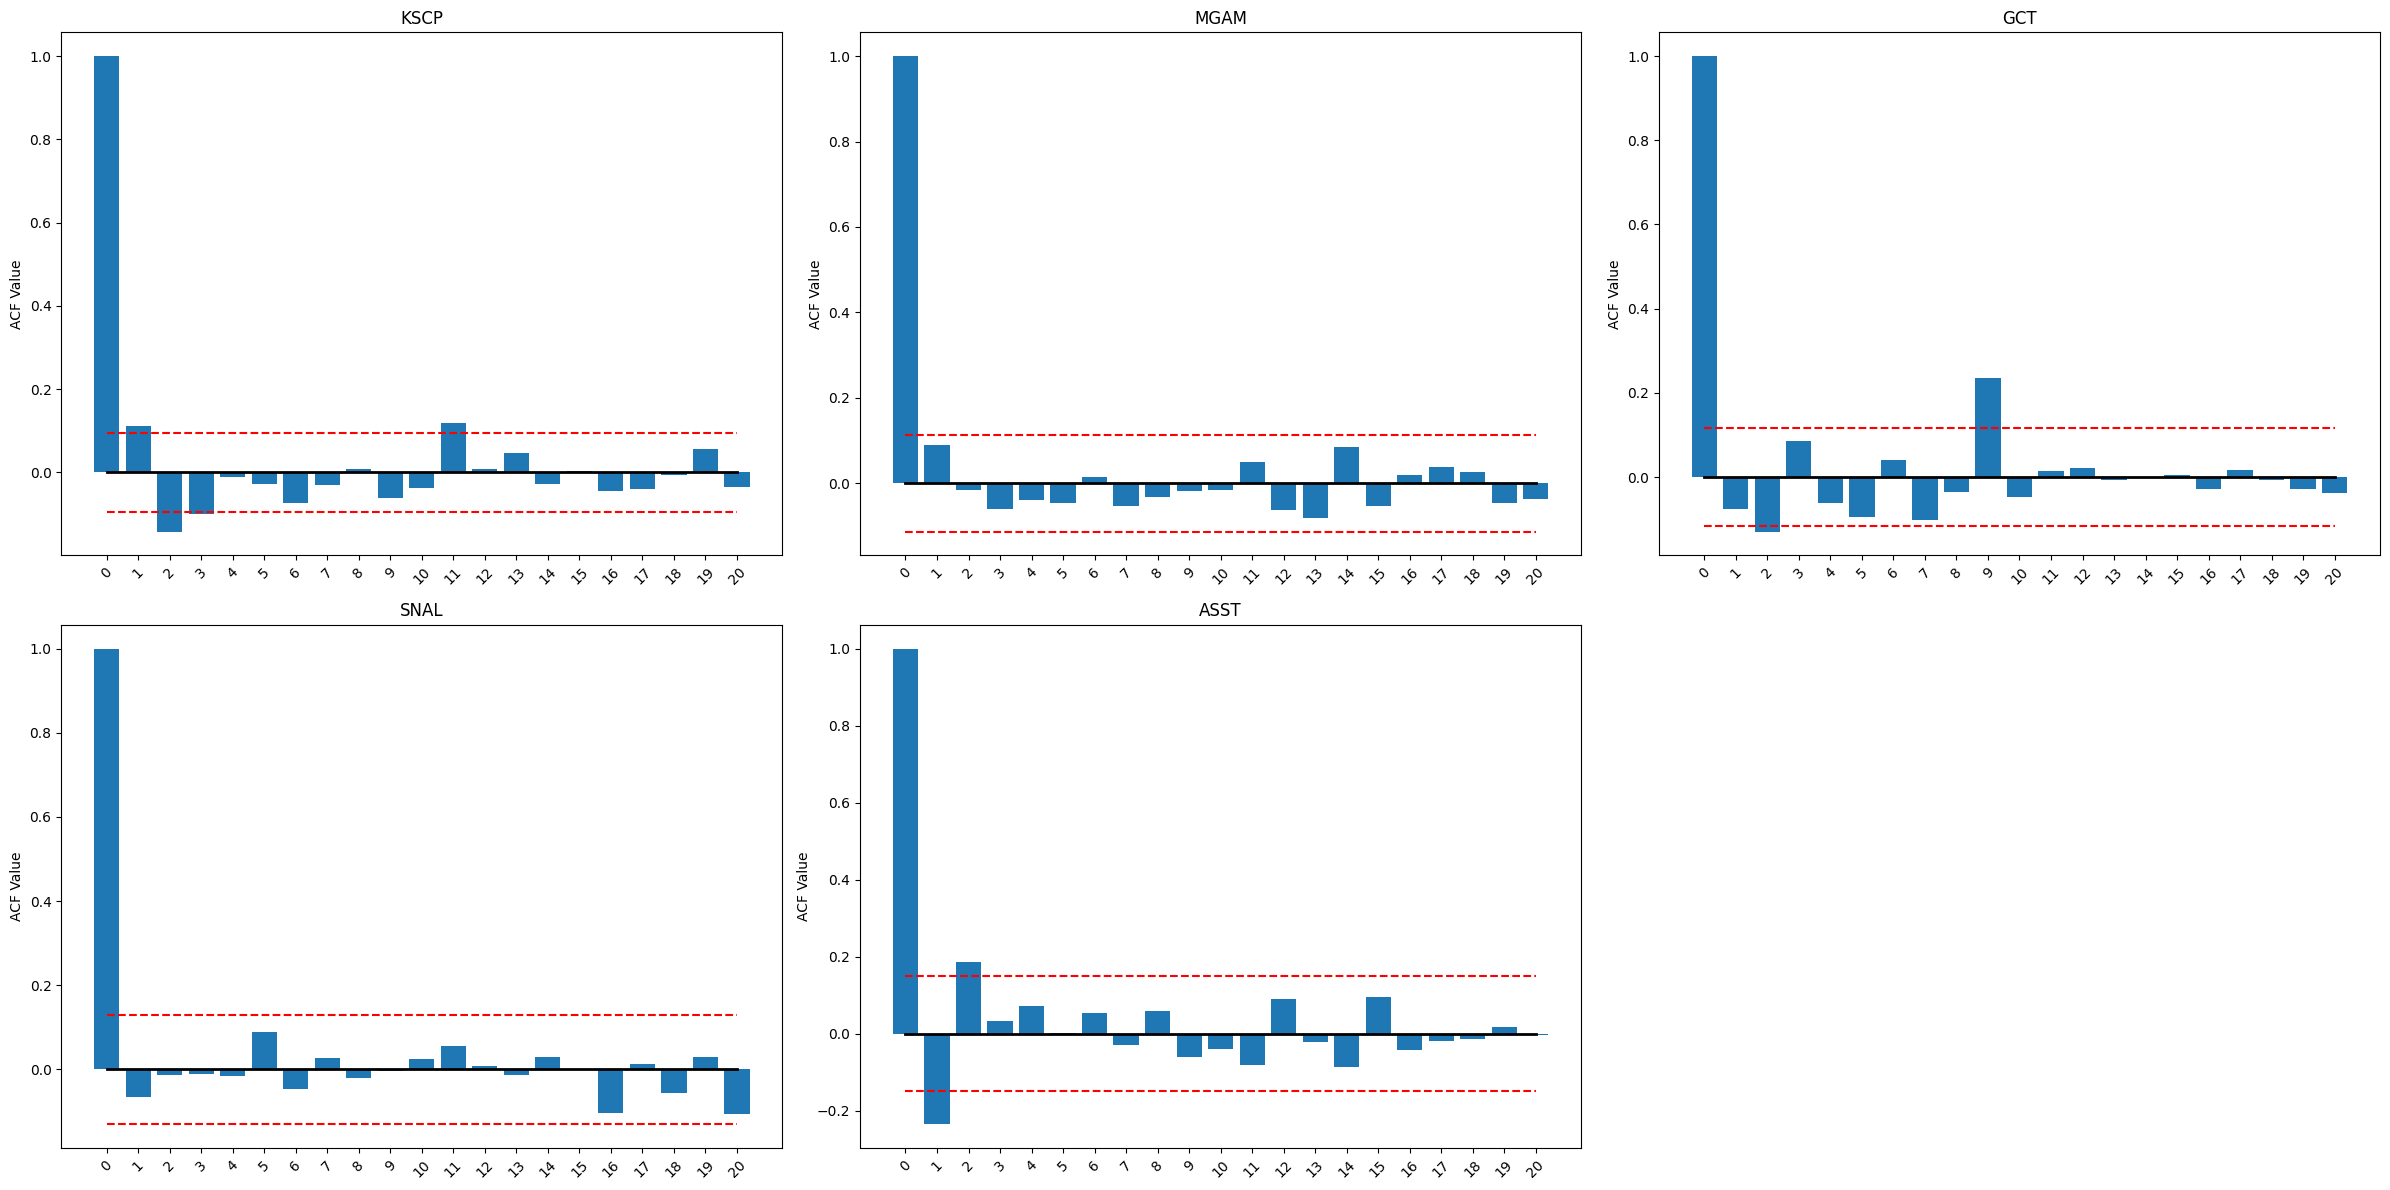

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(24, 12))

unique_tickers = train_scaled["TickerName"].unique()

for index, i in enumerate(unique_tickers):
    row_index, col_index = divmod(index, 3)

    ax = axes[row_index, col_index]
    
    temporary = acf_results[i]

    ax.bar(np.arange(len(temporary)), temporary, label=i)
    ax.plot(np.arange(len(temporary)), 0 * np.arange(len(temporary)), color="black", linewidth=2)
    ax.plot(np.arange(len(temporary)), significant_values[i][0] * np.ones(len(temporary)), '--r', label='Significant Value')
    ax.plot(np.arange(len(temporary)), -significant_values[i][0] * np.ones(len(temporary)), '--r')
    ax.set_xticks(np.arange(len(temporary)))
    ax.set_ylabel("ACF Value")
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(i) 


fig.delaxes(axes[1, 2])
plt.tight_layout() 
plt.show()

### ACF Interpretation
After examining the Autocorrelation Function (ACF) plots for our various tickers, we notice that the tickers for **SNAL** and **MGAM** behave much like white noise. Specifically, there are no significant lags for these two tickers, indicating that their values are independently and identically distributed with no discernible pattern or trend over time. This lack of autocorrelation suggests that past values do not provide any predictive power for future values in the case of these two tickers. As such, we will exclude these tickers when creating our predictive models.

Additionally, these plots tell use that we should first manually use MA orders of 2, 2, 2 (respectively for KSCP, GCT and ASST) when creating our model (we will optimize later but for our first rough model)

### Removing the White Noise Tickers

In [19]:
drop_tickers = ["MGAM", "SNAL"]

train_scaled = train_scaled[~train_scaled["TickerName"].isin(drop_tickers)]
test_scaled = test_scaled[~test_scaled["TickerName"].isin(drop_tickers)]

In [20]:
print(test_scaled["TickerName"].unique())
print(train_scaled["TickerName"].unique())

['KSCP' 'GCT' 'ASST']
['KSCP' 'GCT' 'ASST']


In [21]:
test_scaled.to_csv('test_scaled.csv', index= False)
train_scaled.to_csv('train_scaled.csv', index= False)

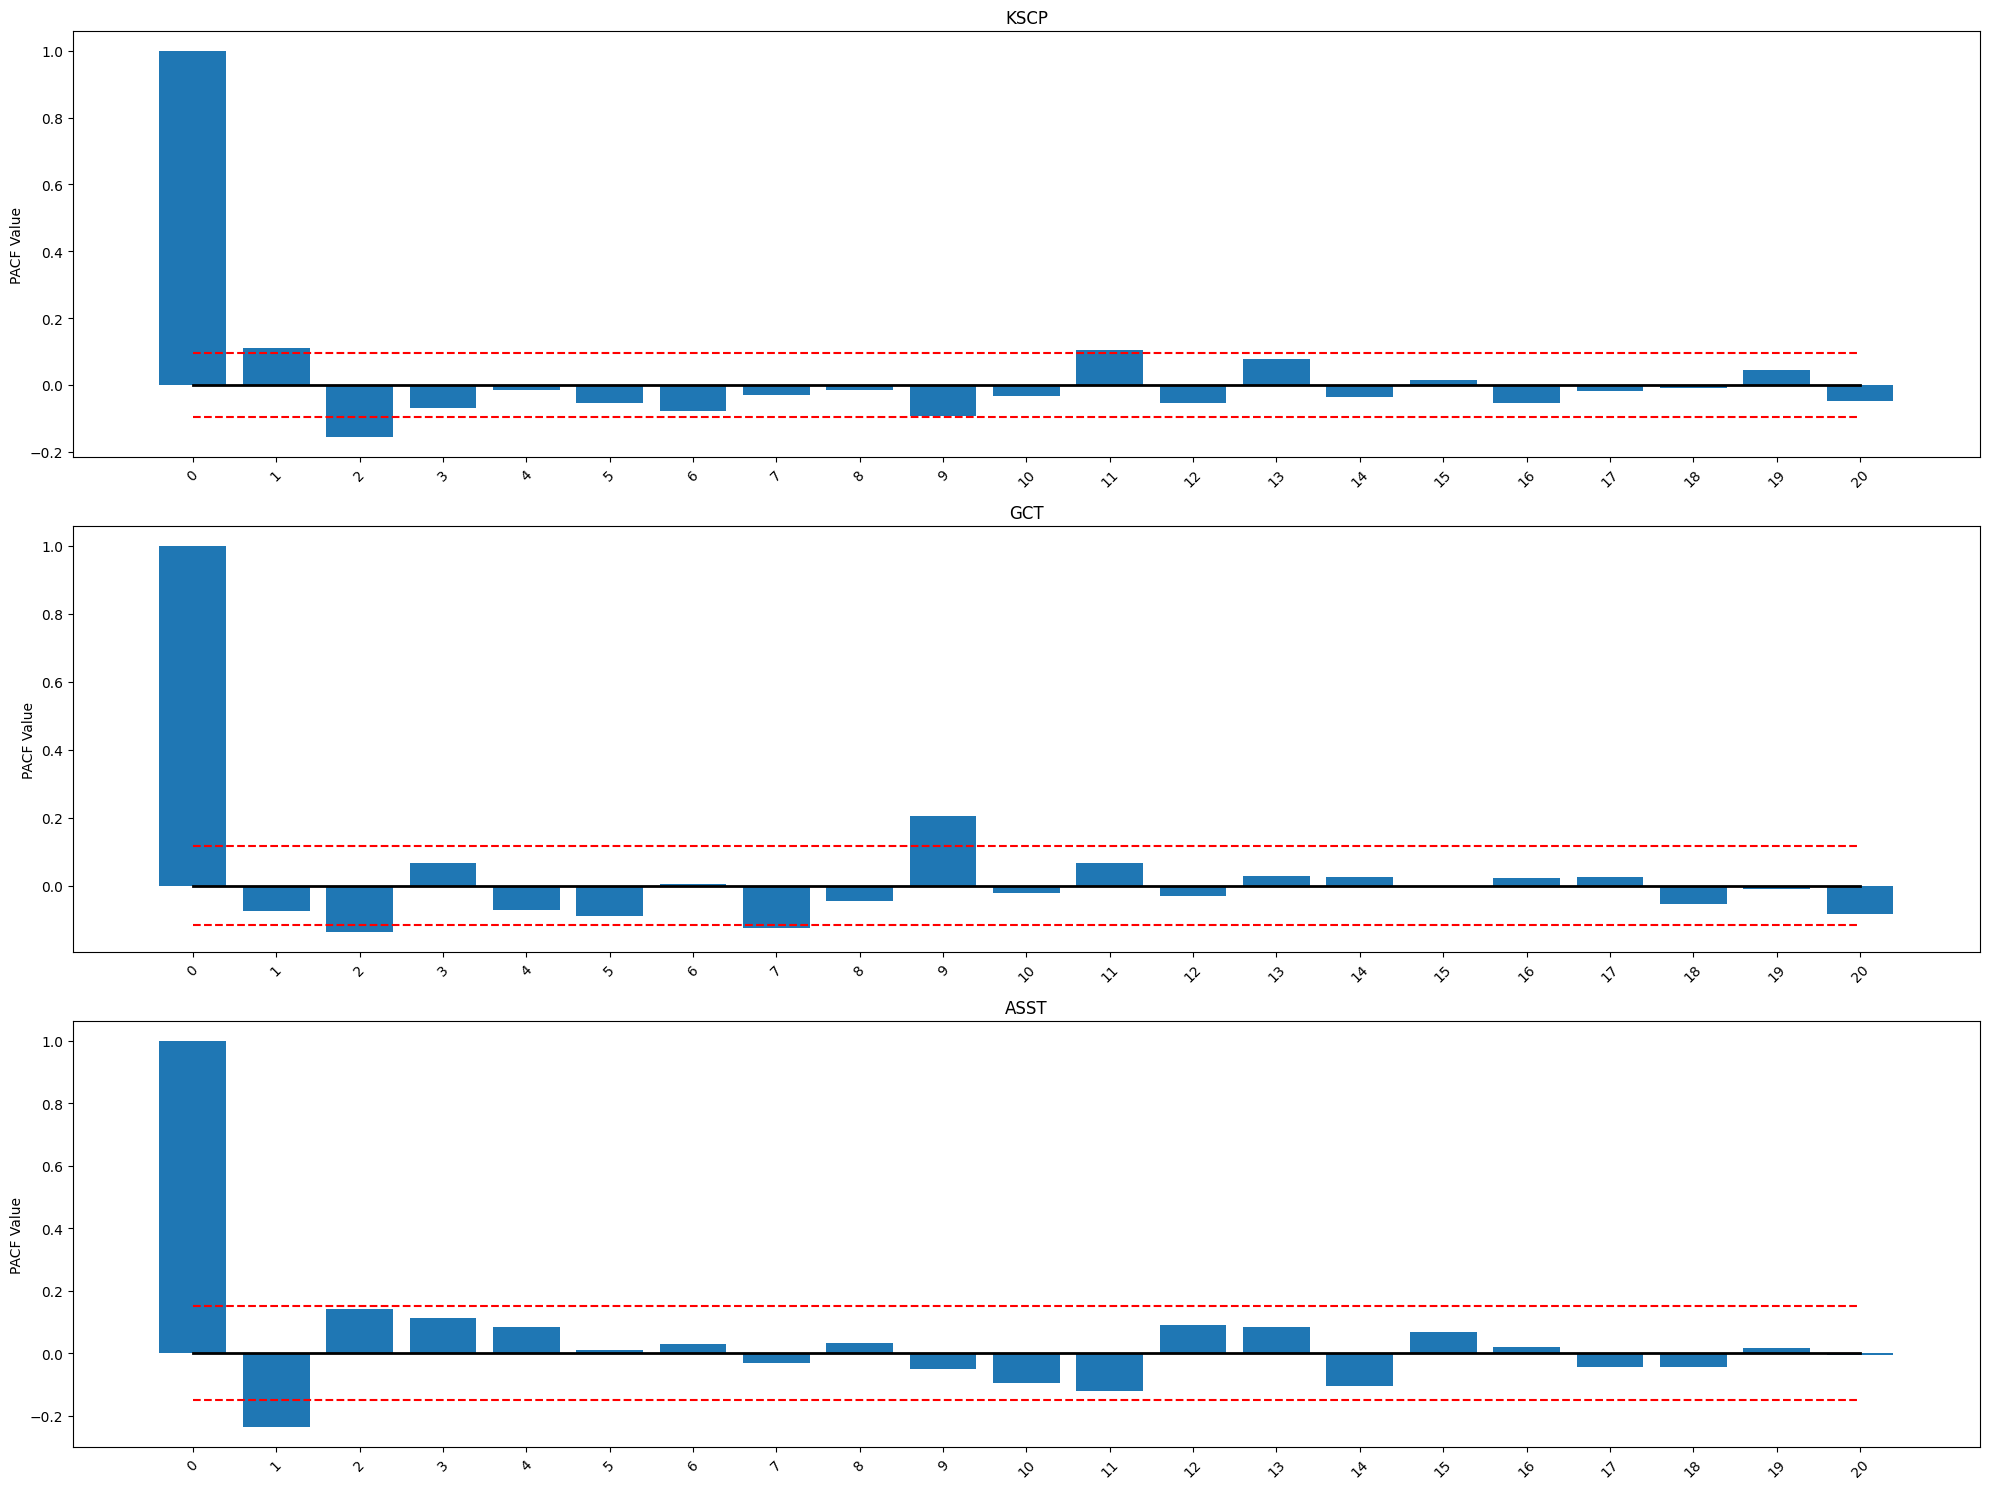

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

unique_tickers = train_scaled["TickerName"].unique()

for index, i in enumerate(unique_tickers):

    ax = axes[index]
    
    temporary = pacf_results[i]

    ax.bar(np.arange(len(temporary)), temporary, label=i)
    ax.plot(np.arange(len(temporary)), 0 * np.arange(len(temporary)), color="black", linewidth=2)
    ax.plot(np.arange(len(temporary)), significant_values[i][0] * np.ones(len(temporary)), '--r', label='Significant Value')
    ax.plot(np.arange(len(temporary)), -significant_values[i][0] * np.ones(len(temporary)), '--r')
    ax.set_xticks(np.arange(len(temporary)))
    ax.set_ylabel("PACF Value")
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(i) 

plt.tight_layout() 
plt.show()

### PCAF Interpretation

These PCAF results tell us that we should use AR orders of 2, 2, 1 (respectively for KSCP, GCT and ASST) when creating our model (we will optimize later but for our first rough model)

### First Initial Model
After looking both our PACF and ACF plots we can start to build our first models for each ticker. KSCP will be an ARMA(2,2) GCT will be an ARMA(2,2) and ASST will be an ARMA(1,2)

In [23]:
from statsmodels.tsa.arima.model import ARIMA

results_dict = {}

for i in ["KSCP", "GCT"]:
    temporary = train_scaled[train_scaled["TickerName"] == i]
    model = ARIMA(temporary["close"], order=(2, 0, 2))
    results = model.fit()
    results_dict[i] = [results, model]

temporary = train_scaled[train_scaled["TickerName"] == "ASST"]
model = ARIMA(temporary["close"], order=(1, 0, 2))
results = model.fit()
results_dict["ASST"] = [results, model]

/Users/andrewlee/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewlee/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewlee/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewlee/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andrewlee/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported

In [24]:
for ticker in results_dict.keys():
    print(f"Results for {ticker}:")
    print(results_dict[ticker][0].summary())
    print("")

Results for KSCP:
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  301
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -374.821
Date:                Thu, 09 Nov 2023   AIC                            761.642
Time:                        21:23:24   BIC                            783.885
Sample:                             0   HQIC                           770.543
                                - 301                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0294      0.030      0.980      0.327      -0.029       0.088
ar.L1          1.0125      0.050     20.324      0.000       0.915       1.110
ar.L2         -0.5782      0.027  

#### RESULTS FROM CREATING MODEL
- ASST's residuals is not distinguishable from white noise AS after creating the model and assessing the results from the Ljung-Box test, we cannot reject the null hypothesis that our residuals are independent over time. As such we know that this model has somewhat captured all the patterns within the data.

- All the lags except for AR 1 for ASST's MA 2 for KSCP seem to be significant 

- Ideally, we want to observe indepedent residuals as this suggests (as stated above) that we have captured most of the (predictable) variance within our data.

- AS far as the skew of our residuals this shouldn't be too large of an issue as we have sufficient sample size to combat this (CLT)

- *We will use AIC, BIC, AND Log Likelihood to guage the impact of hyperparameters*

/Users/andrewlee/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/andrewlee/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/andrewlee/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/andrewlee/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported 

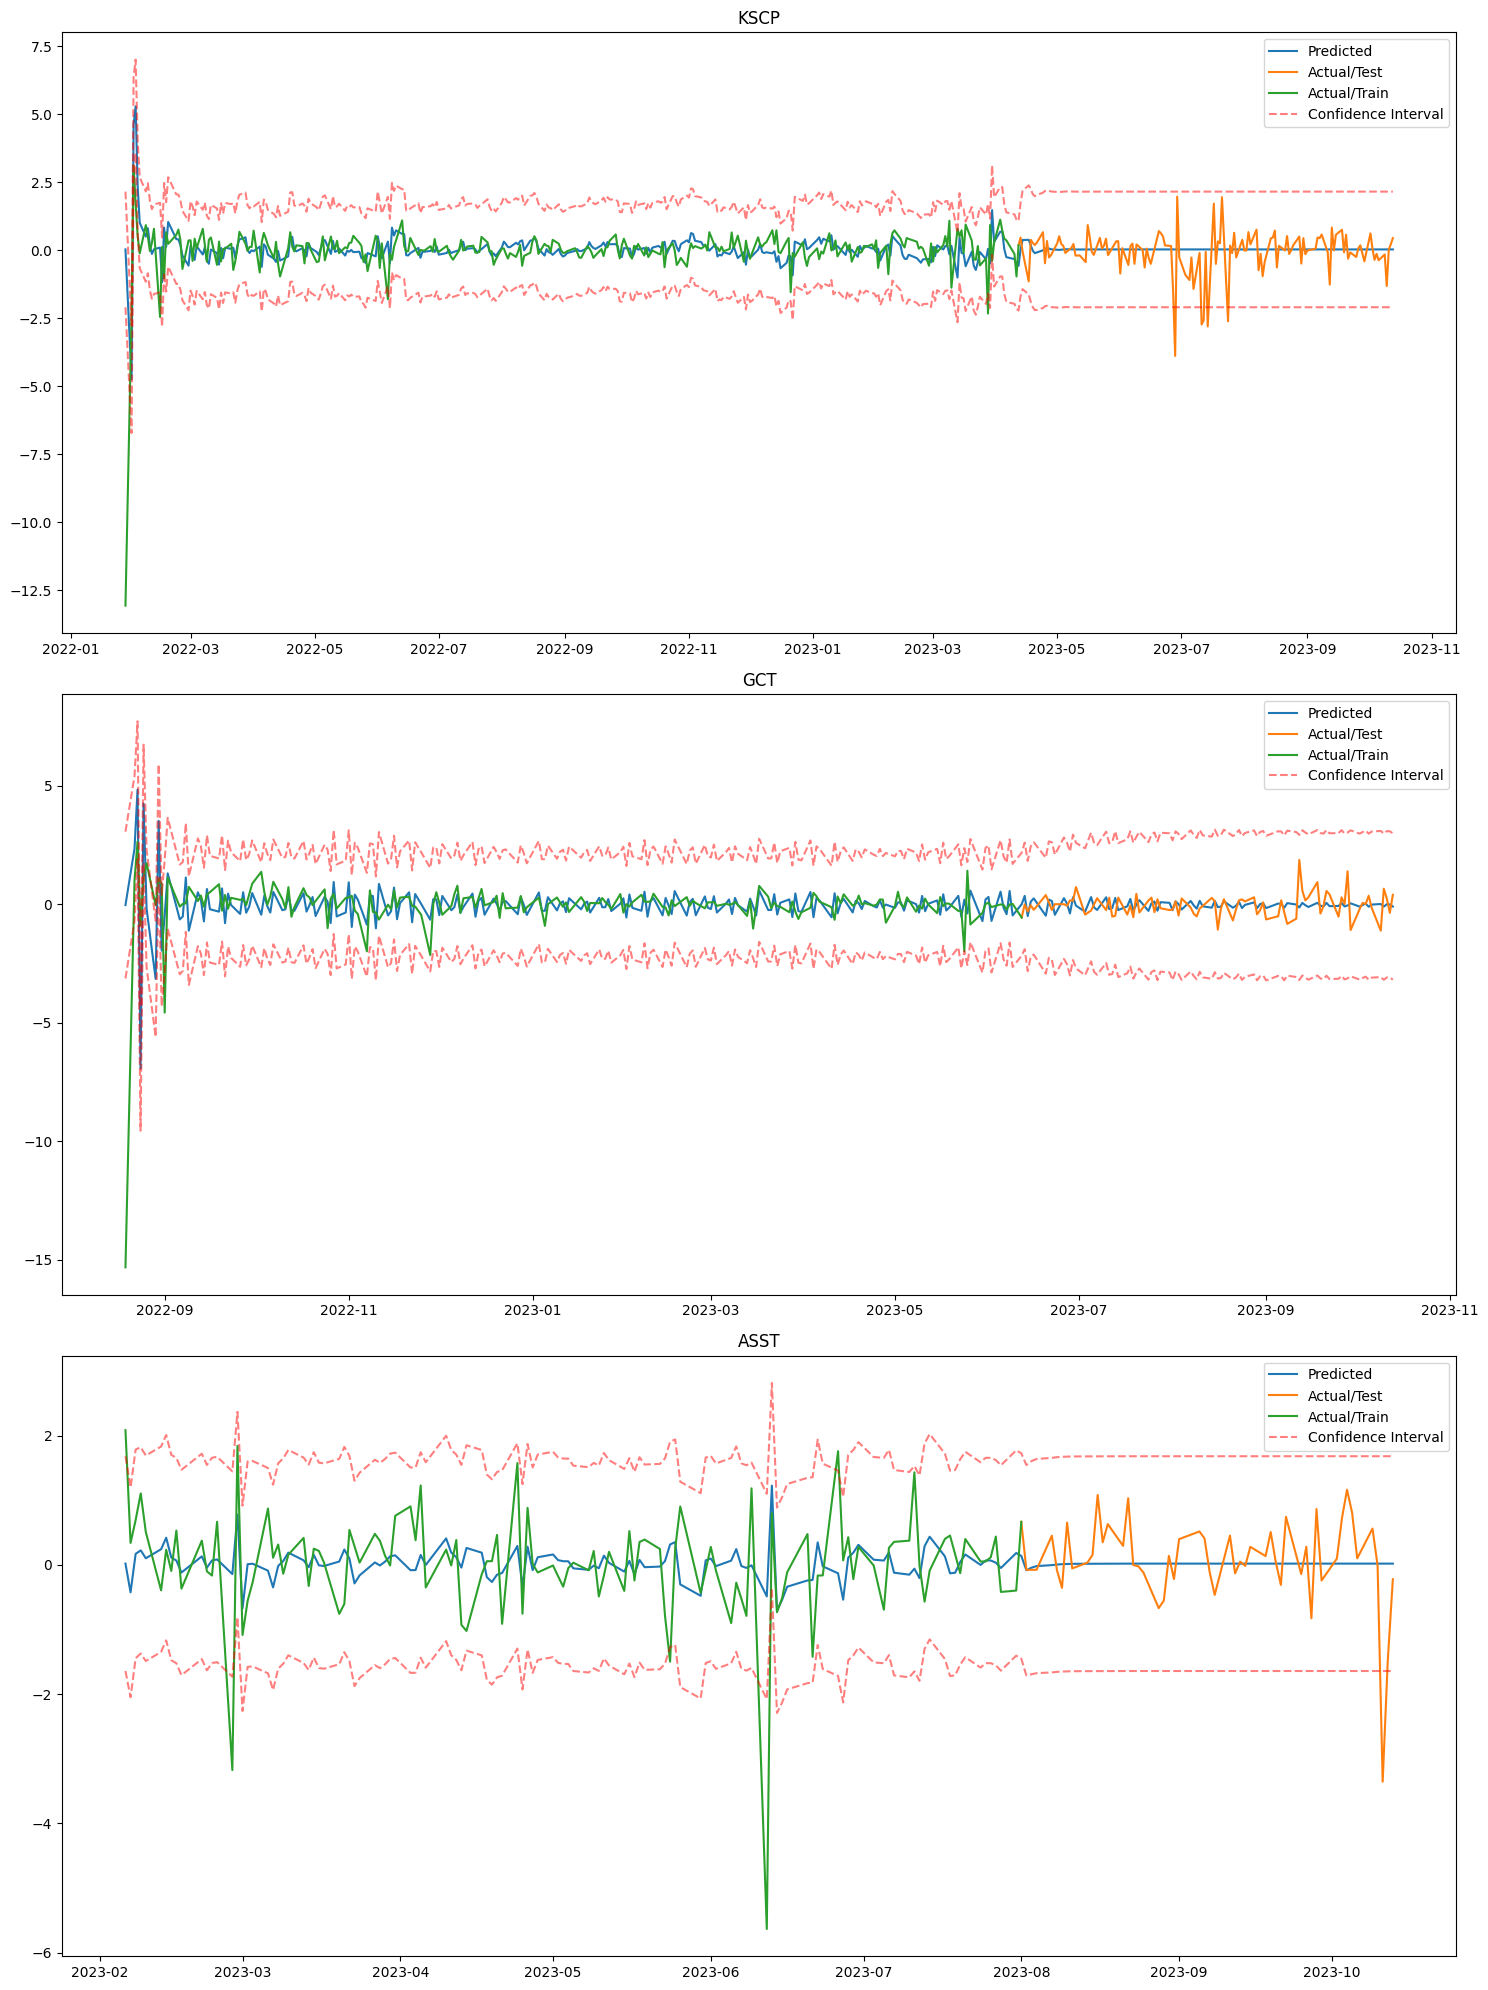

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(15, 20))

values_gotten = {}

for index, ticker in enumerate(results_dict.keys()):
    ax = axes[index]
    temp_train = train_scaled[train_scaled["TickerName"] == ticker]
    temp_test = test_scaled[test_scaled["TickerName"] == ticker]
    results = results_dict[ticker][0].get_prediction(end = len(temp_train["close"]) + len(temp_test["close"]) - 1)
    conf_int = results.conf_int()
    residuals = temp_test["close"] - results.predicted_mean[-len(temp_test["close"]):]
    values_gotten[ticker] = [results.predicted_mean, conf_int, residuals]
    
    formatting = temp_train["date"].to_list()
    formatting2 = temp_train["close"].to_list()
    formatting.append(temp_test["date"].iloc[0])
    formatting2.append(temp_test["close"].iloc[0])

    ax.plot(fixed_data[fixed_data["TickerName"] == ticker]["date"], results.predicted_mean, label="Predicted")
    ax.plot(temp_test["date"], temp_test["close"], label="Actual/Test")
    ax.plot(formatting, formatting2, label="Actual/Train")
    ax.plot(fixed_data[fixed_data["TickerName"] == ticker]["date"], conf_int["lower close"], '--r', label="Confidence Interval", alpha=0.5)
    ax.plot(fixed_data[fixed_data["TickerName"] == ticker]["date"], conf_int["upper close"], '--r', alpha=0.5)
    ax.plot()
    ax.set_title(ticker)
    ax.legend()

plt.tight_layout()
plt.show()

### Why are We Seeing This Type of Behavior

- The simple moving average and single exponential smoothing model a slowly but unsystematically changing mean in a series, by weighting recent data more strongly than older observations. Because these changes are assumed to by unsystematic, we have no good way to forecast how the mean will change in the future - it could go up or down. So the best forecast is the mean as estimated from our full dataset, without any change. As for autoregressive models, there will always be some fluctuations of up and down BUT over time, these fluctuations will die out over time and become basically imperceptible. BECAUSE our ARMA models are a combination of the two (the sum of the two models) this is why we see a decay of the amplitude and convergence towards our mean in our model (this sort of flattening behavior)

- ARMA/Basic Time Series Models aren't good for long term prediction BUT should rather be used for very short term forecast (idealing less lags than the lowest order component of your model)


#### Optimizing Our Model
- In order to optimize our model or see if our model is the most optimal one, we must find the best combination of orders for each component of our ARMA model. To do this, we can iterate through each level and test all possible combinations until we reach one that provides the best predictions.
- Thankfully, we don't need to do this manually as there is a library that can do this for us.

#### Finding the Most Optimal Model

In [32]:
import pmdarima as pm

optimal_fit = {}

for i in ["KSCP", "GCT", "ASST"]:
    temporary = train_scaled[train_scaled["TickerName"] == i]
    model = pm.auto_arima(temporary["close"], start_p=1, start_q=1,
                           test='adf',
                           m=1,
                           d=None, 
                           seasonal=False,
                           start_P=0, 
                           D=0, 
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    optimal_fit[i] = model

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=795.083, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=799.904, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=790.009, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=783.492, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=783.271, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=784.358, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=762.296, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=761.654, Time=0.03 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=755.072, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=761.515, Time=0.03 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=751.876, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=762.864, Time=0.05 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=749.796, Time=0.17 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=761.223, Time=0.07 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=751.6

#### Optimized Model Residual/Performance Analysis

In [35]:
print("KSCP")
print(optimal_fit["KSCP"].summary())
print("GCT")
print(optimal_fit["GCT"].summary())
print("ASST")
print(optimal_fit["ASST"].summary())

KSCP
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  301
Model:               SARIMAX(4, 0, 3)   Log Likelihood                -366.898
Date:                Thu, 09 Nov 2023   AIC                            749.796
Time:                        21:49:12   BIC                            779.453
Sample:                             0   HQIC                           761.663
                                - 301                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6776      0.082      8.296      0.000       0.518       0.838
ar.L2         -1.0560      0.072    -14.696      0.000      -1.197      -0.915
ar.L3          0.6470      0.064     10.056    

#### Evaluating Performance Metrics (p-value, AIC, Log Likeliness, BIC, etc)
- We found the most optimal model for ASST manually as we have both the same orders for our ARMA model (As such there is no change in performance metrics)
- GCT now uses an ARMA(2, 3) model as we add on the third lag and all of our lags become significant for both AR and MA components AND all of goodness of fit metrics such as the AIC and BIC have gone down by roughly 8 (which means our model fits the data better) and our Log-Likeliness has gone up
- KSCP has not gained an additional 3 lags 2 for AR and 1 for MA. All of these are significant, AND similarly to our GCT model, all of the performance metrics have improved.
- Every ticker now has "white noise" residuals and this is good as it suggests that there is independence in our residuals ie; any patterns that we may have missed.


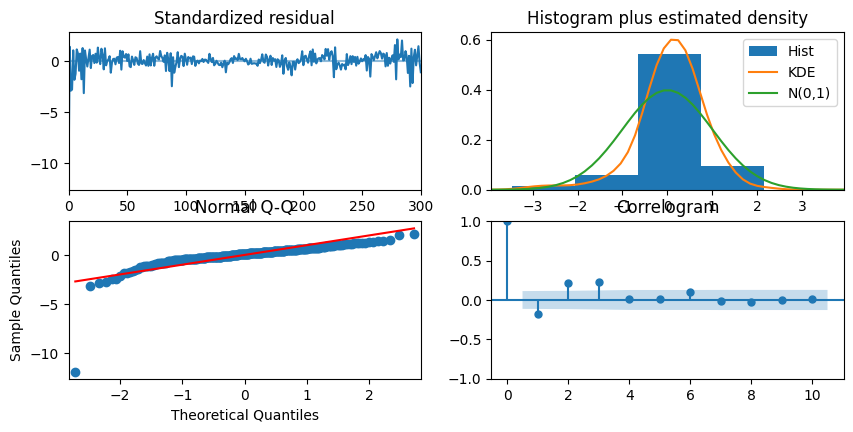

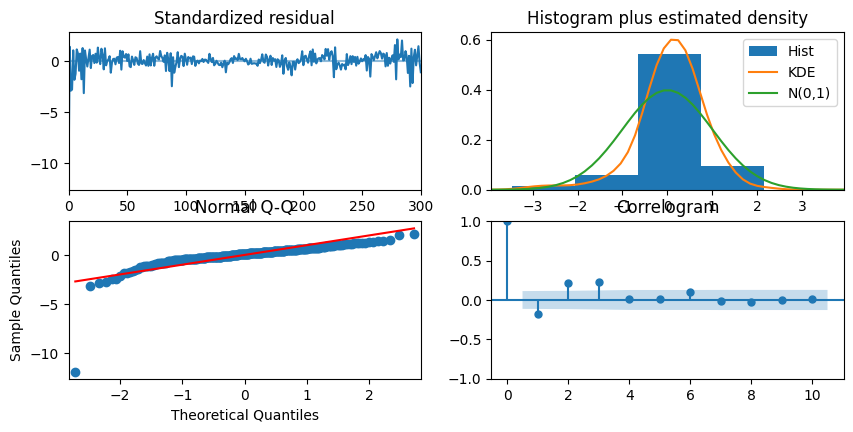

In [47]:
optimal_fit["KSCP"].plot_diagnostics(figsize=(10, 4.5))

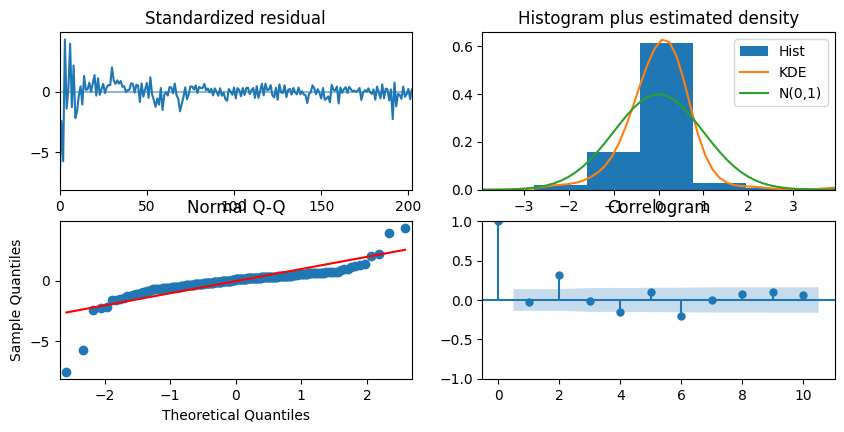

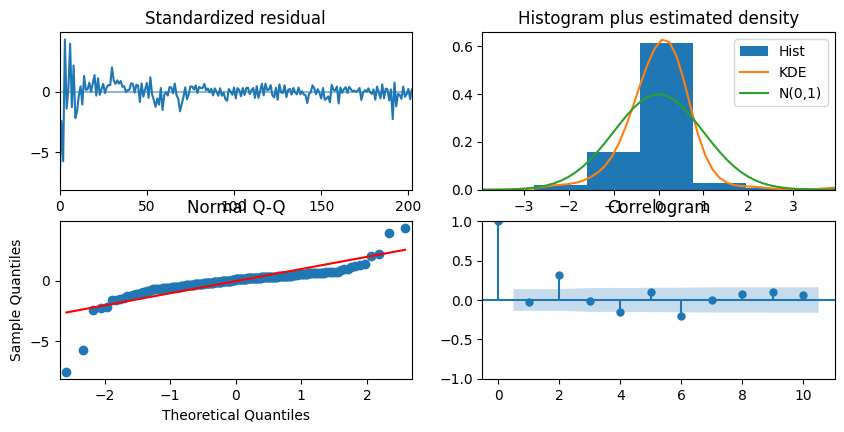

In [44]:
optimal_fit["GCT"].plot_diagnostics(figsize=(10, 4.5))

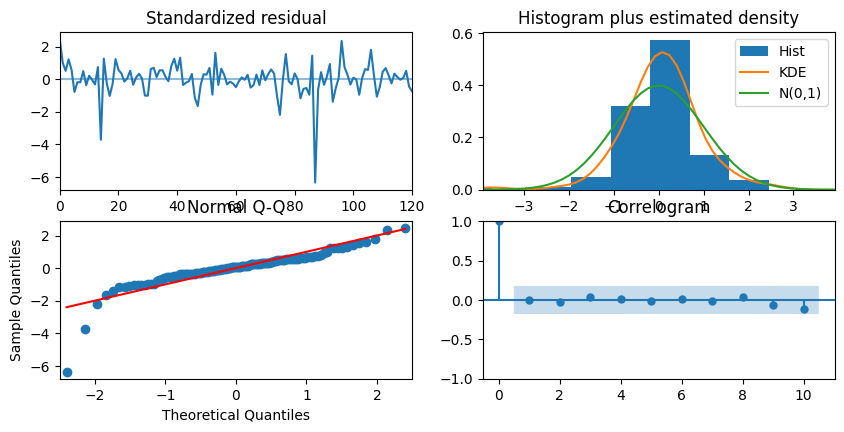

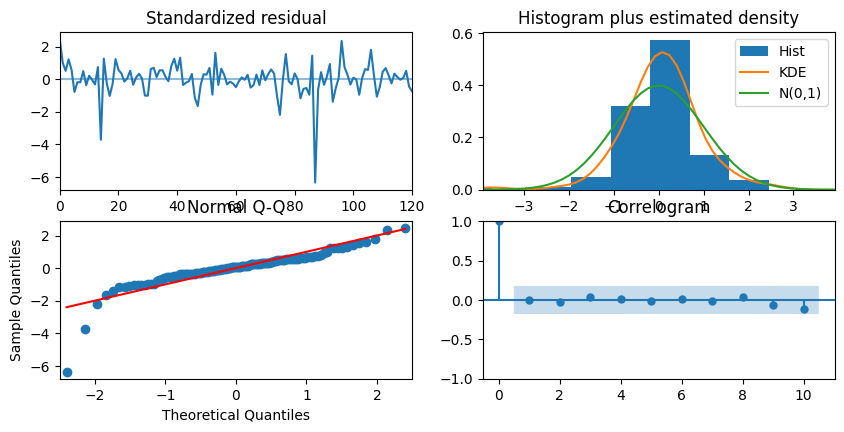

In [48]:
optimal_fit["ASST"].plot_diagnostics(figsize=(10, 4.5))

#### Residual Analysis
- The residuals for our tickers are not normally distributed (left skewed) BUT this is okay as they don't deviate to far from normality, we have sufficient sample size, and generally time series models are pretty robust to this.
- Our residuals show independence as there is no clear pattern or trend within our index plots. We also can observe heterosckadasicity as the variance of our residuals stays constant.
- ASST is the only ticker with no significant ACF values this is what we want as we want oru residuals to resemble white noise.
- KSCP and GCT have 2 to 3 significant ACF values but they're not significant enough to suggest any sort of patterns we may have missed. Additionally this is backed up by the results from the Ljung-Box test.
